# Cancer Type Prediction using Multilayer Perceptron

In [1]:
# import packages
import scipy.io as sio
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
import matplotlib.pyplot as plt

In [2]:
# load data
mat_file = "/Users/christophertarkaa/Bioinformatics/sf5n64hydt-1/cancer types.mat"
mat = sio.loadmat(mat_file)

In [3]:
print(mat.keys())

dict_keys(['__header__', '__version__', '__globals__', 'cancerTypes', 'data', 'geneIds'])


In [4]:
# extract data
X = mat['data']
y = mat['cancerTypes']

In [5]:
# Flatten and extract the strings from the inner arrays
y = np.array([item[0] for item in y.flatten()])

In [ ]:
# Encode the labels 
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
y_onehot = to_categorical(y_encoded)  # Convert to one-hot encoding

In [7]:
# standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [8]:
# split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_onehot, test_size=0.2, random_state=42)

In [9]:
# get input shape and number of classes
input_dim = X_train.shape[1]  # Number of genes (features)
num_classes = y_train.shape[1]  # Number of unique cancer types

In [10]:
input_dim, num_classes

(972, 5)

In [11]:
# Network and training parameters
epochs = 100
batch_size = 32
verbose = 1
n_hidden = 128
validation_split = 0.2 

In [12]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=num_classes,       
                                input_shape=(input_dim,), 
                                activation='relu',     
                                name='dense_layer',
                                kernel_regularizer=tf.keras.regularizers.l2(0.01)))  
model.add(keras.layers.Dense(n_hidden,
                             name='dense_layer_1',
                             activation='relu',
                             kernel_regularizer=tf.keras.regularizers.l2(0.01)))
model.add(keras.layers.Dense(num_classes,
                             name='dense_layer_2',
                             activation='softmax'))   

/Users/christophertarkaa/miniconda3/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [13]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_layer (Dense)             │ (None, 5)              │         4,865 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_1 (Dense)           │ (None, 128)            │           768 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_layer_2 (Dense)           │ (None, 5)              │           645 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,278 (24.52 KB)

 Trainable params: 6,278 (24.52 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
# Compile the model
model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

In [15]:
# Training the model
history = model.fit(X_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=verbose,
          validation_split=validation_split)

Epoch 1/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.4384 - loss: 1.4745 - val_accuracy: 0.6617 - val_loss: 0.8195
Epoch 2/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.8255 - loss: 0.5571 - val_accuracy: 0.8922 - val_loss: 0.4219
Epoch 3/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9470 - loss: 0.3375 - val_accuracy: 0.9401 - val_loss: 0.3479
Epoch 4/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9824 - loss: 0.2540 - val_accuracy: 0.9461 - val_loss: 0.3052
Epoch 5/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9855 - loss: 0.2160 - val_accuracy: 0.9521 - val_loss: 0.2589
Epoch 6/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9886 - loss: 0.1683 - val_accuracy: 0.9611 - val_loss: 0.2342
Epoch 7/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9880 - loss: 0.1484 - val_accuracy: 0.9551 - val_loss: 0.2286
Epoch 8/100
42/42 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9841 - loss: 0.1397 - val_accuracy: 0.9551 - v

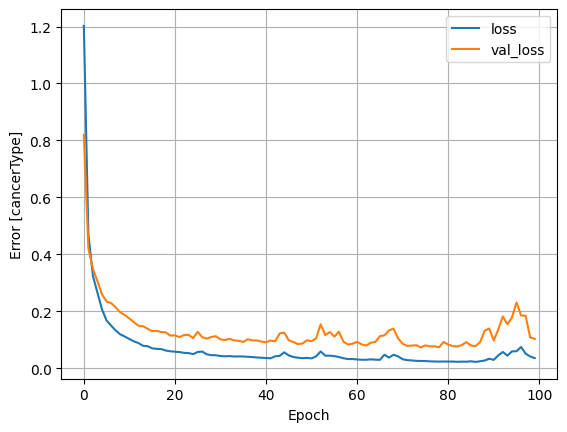

In [16]:
# explore the fitting of the model
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Error [cancerType]')
plt.legend()
plt.grid(True)

In [17]:
# evaluate the model
test_loss, test_acc = model.evaluate(X_test, y_test)
print('Test accuracy:', test_acc)

14/14 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.9720 - loss: 0.1634 
Test accuracy: 0.9712918400764465


In [18]:
# Extract final training and validation accuracy from the history
final_train_accuracy = history.history['accuracy'][-1]
final_val_accuracy = history.history['val_accuracy'][-1]

In [19]:
print('Final training accuracy:', final_train_accuracy)
print('Final validation accuracy:', final_val_accuracy)

Final training accuracy: 0.9992503523826599
Final validation accuracy: 0.976047933101654
